### 通过学习k最近邻分类算法（KNN）的原理，来大致了解如何用Python实现k近邻分类算法，并创建一个自己的KNN分类器。

### 所谓K近邻算法，即是给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的K个实例(也就是上面所说的K个邻居)， 这K个实例的多数属于某个类，就把该输入实例分类到这个类中。


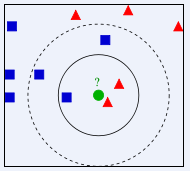
### 如上图所示，当k=3时，绿色圆的邻居中有2个红色三角形，1个蓝色正方形，基于统计的方法判定这个绿色的圆属于红色三角形一类；

### 当k=5时，绿色圆的邻居中有3个蓝色正方形，2个红色三角形，基于统计的方法判定这个绿色的圆属于蓝色正方形一类。

<font color=#ff00ff size=5 face="黑体"> 学习怎样使用Python来计算两个点之间的欧几里得距离</font>

In [3]:
# 自己通过查找help来大致了解numpy库
# 了解 numpy中的sum,sqrt,power等方法
import numpy as np
p1 = np.array([1,1])
p2 = np.array([4,4])
p2 - p1
help(np.sum)
help(np.sqrt)
help(np.power)

Help on function sum in module numpy.core.fromnumeric:

sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>)
    Sum of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Elements to sum.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a sum is performed.  The default,
        axis=None, will sum all of the elements of the input array.  If
        axis is negative it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a sum is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    dtype : dtype, optional
        The type of the returned array and of the accumulator in which the
        elements are summed.  The dtype of `a` is used by default unless `a`
        has an integer dtype of less precision than the default platform
        integer.  In t

In [4]:
# 写一个函数计算两个点之间的距离
def distance(p1,p2):
    """p1 and p2 are two ndarray;
    Find the distance between points p1 and p2, then return the distance;
    """
    return np.sqrt(np.sum(np.square(p1-p2)))  #对元素运算

    

In [5]:
p1 = np.array([1,1])
p2 = np.array([4,4])
print(distance(p1,p2))
p1 = np.array([0,3])
p2 = np.array([4,0])
print(distance(p1,p2))

4.242640687119285
5.0


<font color=#ff00ff size=5 face="黑体"> 学习怎样从一个列表中找到出现频率最高的项</font>

为了创建我们自己的KNN分类器，我们需要计算多数票。
也就是说，给定一个投票数组或者序列，
我们需要决定每个元素出现的次数，并且找到多数票的元素。
比如说，一个数组中有1个1,3个2,2个3，那多数票就是2。


In [6]:
import random

In [7]:
"""
define a function named majority_vote, it takes a parameter votes, which is a list
1)defines a dictionary named vote_counts, in which the key is the item in votes,the value is the count of each item;
2)finds the maximum value from all values of vote_counts;
3)creates an empty list winners;
4)from vote_counts, find the key which has the same value with the maximum value, 
then add it to list winners;
5)return a random item from winners.(hint: you may need the choice function in random module)
"""
def majority_vote(votes):
    """votes is a list;
    Return the most common element in votes"""
    votedic = {}
    mostvotes = None
    for vote in votes:
        if vote not in votedic:
            count = votes.count(vote)#创建计数字典
            votedic[vote] = count
            if count > votedic.get(mostvotes, 0):#如果大于mostvotes 则更新最大值
                mostvotes = vote
    #print(votedic)
    return mostvotes
    
    
    
    
    

In [8]:
# test your function
votes = [1,2,3,1,2,3,1,2,3,3,3,3]
print(majority_vote(votes))

3


<font color=#ff00ff size=5 face="黑体"> 从一个列表中找到出现频率最高的项的另一种高效方法</font>

In [9]:
# search from baidu or google： how to find the mode of a Numpy array
# then modify the above majority_vote function
# write a new function named majortiy_vote_short,which does the same thing as the above majority_vote function, but is very efficient
import scipy.stats as ss
def majority_vote_short(votes):
    """
    Return the most common element in votes
    """
    return ss.mode(votes)[0][0]
    

In [10]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]
print(majority_vote_short(votes))

3


<font color=#ff00ff size=5 face="黑体"> 学习怎样找到一个对象最近的邻居</font>

### 在k近邻算法中，对于任何一个指定的点，我们需要找到离它最近的邻居，进而进行分类

In [11]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

import matplotlib.pyplot as plt
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")

plt.axis([0.5,3.5,0.5,3.5])

plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
# compute the distance between each point in points and p
distances = np.zeros(points.shape[0])#[0]指第二维长度
# your code is here
for i in range(len(distances)):
    distances[i]=distance(points[i],p)
    
print(distances)

[1.80277564 1.5        1.80277564 1.11803399 0.5        1.11803399
 1.11803399 0.5        1.11803399]


In [13]:
points[4]

array([2, 2])

In [14]:
distances[4]

0.5

In [15]:
points[7]

array([3, 2])

In [16]:
distances[7]

0.5

In [17]:
# argsort is a function in Numpy
# it returns to indices that would sort the given array.
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [18]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [19]:
distances[ind[0:2]]

array([0.5, 0.5])

In [20]:
# define a function named find_nearest_neighbors, 
# which has three parameters p,points,k

# loop over all points
# compute the distance between point p and every other point in points
# sort distances and return those k points that are nearest to point p
def find_nearest_neighbors(p,points,k=5):
    """
    p: a point;
    points: an array of points;
    k: an integer, default value is 5;
    Find the k nearest neighbors of point p and return their indices."""
    distances = np.zeros(points.shape[0])
# your code is here
    for i in range(len(distances)):
        distances[i]=distance(points[i],p)
    ind = np.argsort(distances)
    return ind[:k]


    
    
    
    
    
    

In [21]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

ind = find_nearest_neighbors(p,points,2)
print(points[ind])

[[2 2]
 [3 2]]


In [22]:
ind = find_nearest_neighbors(p,points,3)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [23]:
ind = find_nearest_neighbors(p,points,4)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]
 [2 3]]


In [24]:
# write the function to predict the class of our new point p

def knn_predict(p,points,outcomes,k=5):
    """
    - p is the new point we'd like to classify
    - points are our existing data or our training data
    - outcomes are the classes to which these k points belong to."""
    # find k nearest neighbors
    ind = find_nearest_neighbors(p,points,k)
    return(majority_vote_short(outcomes[ind]))
    # predict the class of p based on majority vote
    

In [25]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
p = np.array([2.5,2.7])
knn_predict(p,points,outcomes,k=2)

1

<font color=#0000ff size=6 face="黑体">下面的函数和代码已经全部实现并给出，请查找相关库的官方文档，了解库中方法的使用。</font>

<font color=#ff00ff size=5 face="黑体"> 学习怎样产生模拟数据</font>

In [26]:
ss.norm(0,1).rvs((5,2))

array([[ 1.03057135e+00,  8.54218686e-01],
       [-3.05590881e-04,  1.45016595e+00],
       [-1.65382890e+00, -6.93558093e-01],
       [-5.94998484e-01,  1.62728739e+00],
       [-1.65718152e+00, -8.87684554e-02]])

In [27]:
ss.norm(0,1).rvs((5,2))

array([[ 1.20939602, -2.21889887],
       [-0.81969328, -0.58697902],
       [-1.96201063,  0.10943904],
       [ 2.45273576,  0.31011671],
       [-0.0903605 , -0.44052569]])

In [28]:
# write a function that generates two end data points
# the first end points are from class 0
# the second end points are from class 1
# these are known as synthetic data
# generate predictors from two bivariate normal distributions
def generate_synth_data(n=50):
    """Create two sets of points from bivariate normal distribution"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(0,1).rvs((n,2))),axis=0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

In [29]:
n = 20
(points,outcomes) = generate_synth_data(n)
points.shape

(40, 2)

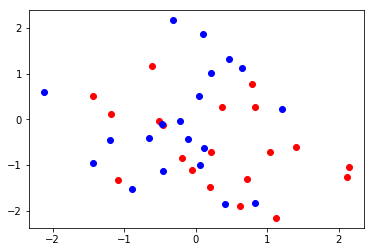

In [30]:
# we have n red points and n blue points corresponding to the two different categories.
plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro")
plt.plot(points[n:,0],points[n:,1],"bo")
plt.savefig("bivariatedata.pdf")
plt.show()

<font color=#ff00ff size=5 face="黑体"> 学习怎样预测网格;</font>
<font color=#ff00ff size=5 face="黑体"> 学习enumerate的使用；</font>
    <font color=#ff00ff size=5 face="黑体"> 学习怎样使用numpy中的meshgrid.</font>

In [31]:
# plot a prediction grid
# This means that once we've observed our data,
# we can examine some part of the predictor space and compute the class prediction for each
# point in the grid using the knn classifier.
# so instead of finding out how our classifier might classify a given point,
# we can ask how it classifies all points that belong to a rectangular region of the predictor space


# meshgrid takes in two or more coordinate vectors, say one vector containing the x values,
# the other containing the y values of interest;
# it returns matrices, the first containing the x values for each grid point and the 
# secoond containing the y values for each grid point.
def make_predictin_grid(predictors,outcomes,limits,h,k):
    """Classify each point on the prediction grid."""
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape,dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p,predictors,outcomes,k)
    return (xx,yy,prediction_grid)

<font color=#ff00ff size=5 face="黑体"> 学习怎样画出预测网格;</font>

In [32]:
# a function used to plot the prediction grid
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [33]:
predictors, outcomes = generate_synth_data() # default n=50

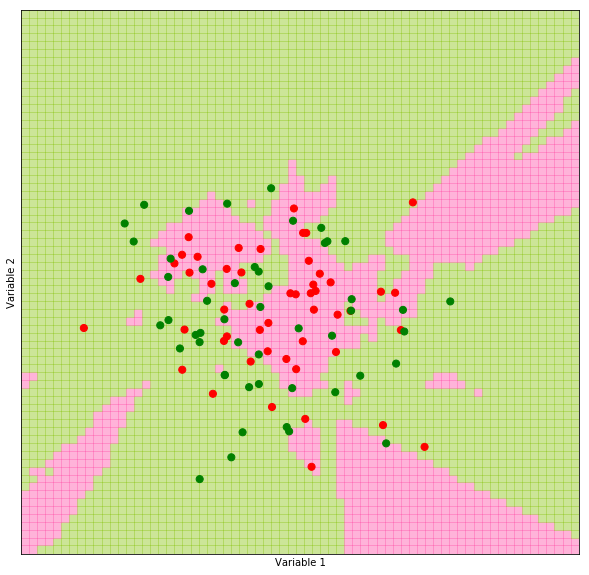

In [125]:
k=5
filename = "knn_synth_5.pdf"
limits = (-3,4,-3,4)
h=0.1
(xx,yy,prediction_grid) = make_predictin_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

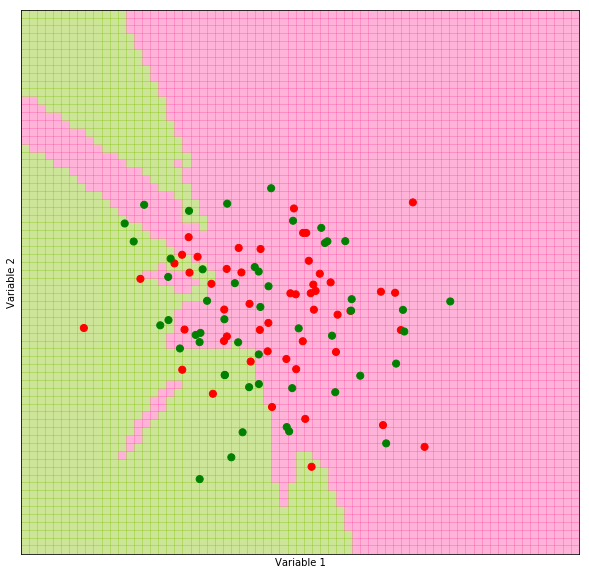

In [126]:
k=50
filename = "knn_synth_50.pdf"
limits = (-3,4,-3,4)
h=0.1
(xx,yy,prediction_grid) = make_predictin_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

<font color=#ff00ff size=5 face="黑体"> 在真实数据集上应用自己创建的KNN分类器</font>

### [scikit-learn](https://scikit-learn.org/stable/) 是用Python开发的机器学习第三方库，其中封装了大量的机器学习算法（分类、回归、降维以及聚类；还包含了监督学习、非监督学习、数据变换三大模块），内置了大量的公开数据集，并且拥有完善的文档，是机器学习、数据挖掘和分析的强大工具。

### 接下来，我们将使用scikit-learn中的分类器和我们自己构建的分类器对iris数据集进行分类。

In [127]:
from sklearn import datasets
iris = datasets.load_iris()

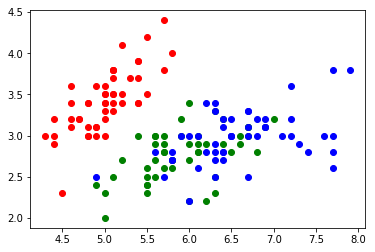

In [128]:
predictors = iris.data[:,0:2] # all of the rows but only columns 0 and 1
outcomes = iris.target

plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1],"go")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1],"bo")
plt.savefig("iris.pdf")

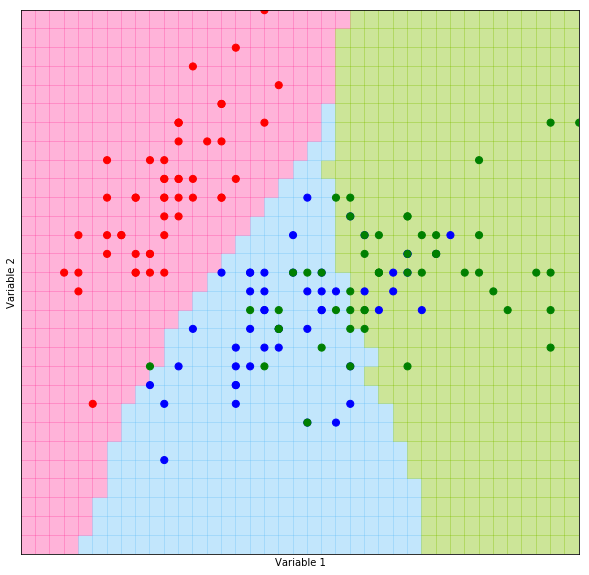

In [129]:
k=50
filename = "iris_grid.pdf"
limits = (4,8,1.5,4.5)
h=0.1
(xx,yy,prediction_grid) = make_predictin_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors,outcomes)
sk_predictions = knn.predict(predictors)

In [131]:
sk_predictions.shape

(150,)

In [132]:
my_predictions = np.array([knn_predict(p,predictors,outcomes,5) for p in predictors])

In [133]:
my_predictions.shape

(150,)

In [134]:
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [135]:
print(100*np.mean(sk_predictions == my_predictions)) 
# our predictions and the scikit predictions agree 96% of the time

96.0


In [136]:
print(100*np.mean(sk_predictions == outcomes))

83.33333333333334


In [137]:
print(100*np.mean(my_predictions == outcomes))

84.66666666666667
